In [419]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [420]:
import warnings
warnings.filterwarnings("ignore")

In [421]:
from sklearn.feature_selection import VarianceThreshold

In [422]:
import collections

In [423]:
%matplotlib inline

In [424]:
train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")

# 1. Data Overview (tu trzeba będzie dodać jeszcze jakiś opis co tak naprawdę chcemy zrobić, skąd wzięliśmy dataset itd.) 

At first we have a brief look at the initial form of our data, so to get sense how we should prepare our data to make it suitable for the modelling


In [425]:
train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Number of rows is:

In [426]:
train.shape[0]

1460

Types of variables in dataset, it is really long so we will only show the number of variables in specific group:

In [427]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

Now we know that our data has 81 columns and 1460 rows. The number of columns is definetely too big for the purpose of this analysis. So our first task will be to select the limited number of features which will suit our model in the best way.

# 2. Data preparation

## 2.1. Dependent variable SalePrice overview

Our dependent variable is SalePrice, which is the price the house were sold. Here are some basic information about it 

In [428]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

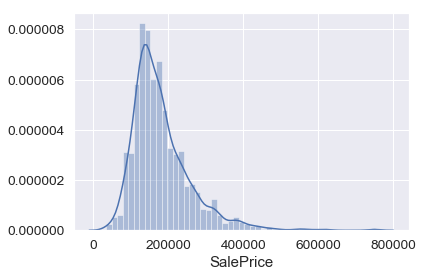

In [429]:
sns.distplot(train["SalePrice"])

In [430]:
print("The skewness is:",train.SalePrice.skew())
print("The kurtosis is:",train.SalePrice.kurt())

The skewness is: 1.8828757597682129
The kurtosis is: 6.536281860064529


So we can see that our dependent variable does not have a perfect normal distribution. We can try improving it by log normalization 


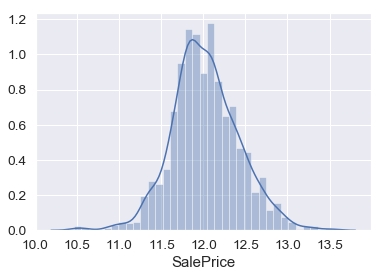

In [431]:
sns.distplot(np.log1p(train.SalePrice))

We can see that actually the log normalized distribution of dependent variable seems to be closer to the normal distribution. We will not modify SalesPrice variable now. But just in case we will save the log normalized one in memory

In [432]:
log1SalePrice = np.log1p(train.SalePrice)

## 2.2. Limiting the number of variables

### 2.2.1. Identifying redundant variables

Having in mind that we have 81 variables in our data frame it would be useful to remove some of them to simplify the analysis. First we can get rid off Id variable which is surely not going to bring us anything important. 

In [433]:
train = train.drop(columns = "Id")

In [434]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now we can take a look at the correlation matrix

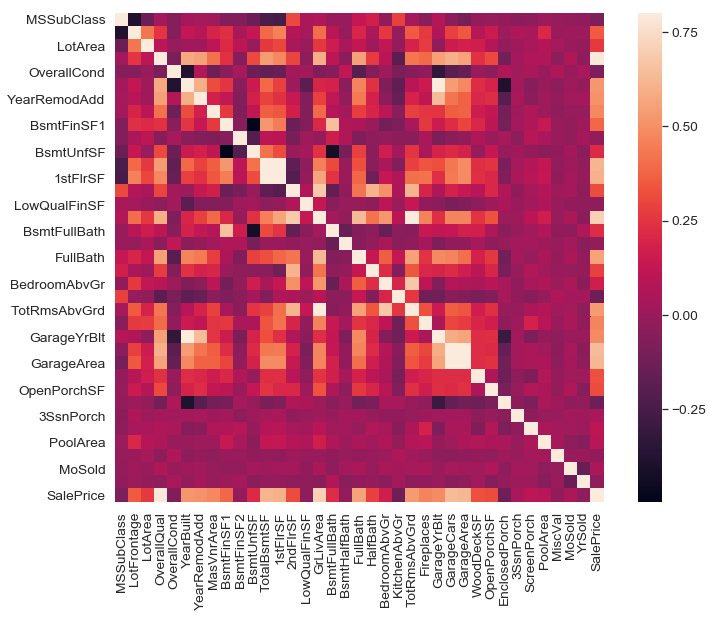

In [435]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

There is a high corellation between variables GarageArea/GarageCars and 1stFlrSF/TotalBsmtSF. 
1. First let's take a look at Garage variables. It is pretty obvious GarageCars which is "Size of garage in car capacity" is correlated with the area of garage. Therefore there is no need to keep both variables 
2. The second relations is between the total sq feet of First floor and total sq feet of basement. It's again pretty self explanatory that those variables are correlated. 
3. We decide to remove the variable GarageCars and TotalBsmtSF

In [436]:
train = train.drop(columns = ["GarageCars", "TotalBsmtSF"])

After above operations we still have 78 variables (it is important to indicate that we haven't even encoded the nominal variables yet). In the next step we will take a deeper look at NAs so to eliminate variables which are full of them

### 2.2.2. Removing NAs

Let's see what is a percantage of NA observations in the variables we have selected:

In [437]:
na_percantage = dict((train.isna().sum()/train.shape[0])*100)
na_percantage 
na_percentage_sorted = sorted(na_percantage.items(), key=lambda kv: kv[1], reverse=True)
na_percentage_sorted = collections.OrderedDict(na_percentage_sorted)
na_percentage_sorted

OrderedDict([('PoolQC', 99.52054794520548),
             ('MiscFeature', 96.30136986301369),
             ('Alley', 93.76712328767123),
             ('Fence', 80.75342465753424),
             ('FireplaceQu', 47.26027397260274),
             ('LotFrontage', 17.73972602739726),
             ('GarageType', 5.5479452054794525),
             ('GarageYrBlt', 5.5479452054794525),
             ('GarageFinish', 5.5479452054794525),
             ('GarageQual', 5.5479452054794525),
             ('GarageCond', 5.5479452054794525),
             ('BsmtExposure', 2.6027397260273974),
             ('BsmtFinType2', 2.6027397260273974),
             ('BsmtQual', 2.5342465753424657),
             ('BsmtCond', 2.5342465753424657),
             ('BsmtFinType1', 2.5342465753424657),
             ('MasVnrType', 0.547945205479452),
             ('MasVnrArea', 0.547945205479452),
             ('Electrical', 0.0684931506849315),
             ('MSSubClass', 0.0),
             ('MSZoning', 0.0),
             ('Lo

We decided to drop all the columns where there are more than 50% of Nans. However, additionaly we drop also "FireplaceQu" and "LotFrontage" cause those variables doesn't really seem to be really valuable for our analysis

In [438]:
for k,v in na_percentage_sorted.items():
    if v > 10:
        train = train.drop(columns=k)

For the variables presented beneath we will replace the NAs with the value of averagely occuring element of the variabel

In [439]:
na_percantage = dict((train.isna().sum()/train.shape[0])*100)
na_percantage 
na_percentage_sorted = sorted(na_percantage.items(), key=lambda kv: kv[1], reverse=True)
na_percentage_sorted = collections.OrderedDict(na_percentage_sorted)
for k, v in na_percantage.items():
    if v > 0:
        pass
    else:
        na_percentage_sorted.pop(k)

In [418]:
na_percentage_sorted

OrderedDict([('GarageType', 5.5479452054794525),
             ('GarageYrBlt', 5.5479452054794525),
             ('GarageFinish', 5.5479452054794525),
             ('GarageQual', 5.5479452054794525),
             ('GarageCond', 5.5479452054794525),
             ('BsmtExposure', 2.6027397260273974),
             ('BsmtFinType2', 2.6027397260273974),
             ('BsmtQual', 2.5342465753424657),
             ('BsmtCond', 2.5342465753424657),
             ('BsmtFinType1', 2.5342465753424657),
             ('MasVnrType', 0.547945205479452),
             ('MasVnrArea', 0.547945205479452),
             ('Electrical', 0.0684931506849315)])

In [ ]:
for key in na_percentage_sorted.keys():
    D = train[key].value_counts(dropna = False).to_dict()
#     print(test)
#     target = sum(test.values())/len(test.values())
#     val = min(test.items(), key=lambda kv : abs(kv[1] - target))[0]
#     if str(val) == "nan":
#         pass
#     else:
#         na_percentage_sorted[str(val)] == na_percentage_sorted[value] + na_percentage_sorted["nan"]
    
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

    plt.show()

### 2.2.2. One hot encoding


As we have seen in the chapter 1. There are a lot of object type variables in our dataset. They are nominal variables we have to convert to dummy ones to make them useful for further analysis. We can also have a look at the levels of those variables. 

In [ ]:
nominal_variables = []
num_variables = []
for i in train.columns:
    if str(train[i].dtypes) == "object":
        nominal_variables.append(i)
        print(i,":", train[i].unique(), ";" ,len(train[i].unique()))
    else:
        num_variables.append(i)
train = pd.concat([train[num_variables], pd.get_dummies(train[nominal_variables])], axis=1)

### 2.2.3 Limiting Number of variables to those mostly correlated with dependent variable

In [246]:
corr_1 = train.corr()


most_correlated_with_SalePrice = corr_1.SalePrice.to_dict()

for k, v in most_correlated_with_SalePrice.items():
    most_correlated_with_SalePrice[k] = abs(v)
most_correlated_with_SalePrice = sorted(most_correlated_with_SalePrice.items(), key=lambda kv: kv[1], reverse=True)
# most_correlated_with_SalePrice
most_correlated_names = []

for x in most_correlated_with_SalePrice:
    most_correlated_names.append(x[0])

most_correlated_with_SalePrice

[('SalePrice', 1.0),
 ('OverallQual', 0.7909816005838047),
 ('GrLivArea', 0.7086244776126511),
 ('GarageArea', 0.6234314389183598),
 ('1stFlrSF', 0.6058521846919166),
 ('ExterQual_TA', 0.589043523409763),
 ('FullBath', 0.5606637627484452),
 ('BsmtQual_Ex', 0.5531048470089422),
 ('TotRmsAbvGrd', 0.5337231555820238),
 ('YearBuilt', 0.5228973328794967),
 ('KitchenQual_TA', 0.5192978536548846),
 ('YearRemodAdd', 0.5071009671113867),
 ('KitchenQual_Ex', 0.5040936759052956),
 ('Foundation_PConc', 0.4977337525869438),
 ('GarageYrBlt', 0.48636167748786213),
 ('MasVnrArea', 0.4774930470957107),
 ('Fireplaces', 0.4669288367515242),
 ('ExterQual_Gd', 0.45246612784479223),
 ('BsmtQual_TA', 0.45239353235010327),
 ('ExterQual_Ex', 0.45116433022275354),
 ('BsmtFinType1_GLQ', 0.4345973468827756),
 ('HeatingQC_Ex', 0.434543238532467),
 ('GarageFinish_Fin', 0.41967796781801714),
 ('GarageFinish_Unf', 0.41060831129167175),
 ('Neighborhood_NridgHt', 0.40214859817526666),
 ('BsmtFinSF1', 0.3864198062421562

Now we can see the most correlated variables with SalePrice in terms of absolute values. We can limit our dataset to those variables. We are left with 34 independent variables

In [214]:
train = train[most_correlated_names]

# Rzeczy do zrobienia

1. Na razie doszedłem do momentu wyrzucenia z db niektórych niepotrzebnych zmiennych. Kolejny krok, to dla tych, dla których są jeszcze obserwacje NA, żeby zastąpić je czymś (moim zdaniem wartością, która występuje "średnią" liczbę razy dla danej zmiennej)

2. Następny krok to będzie rozkodowanie zmiennych nominalnych na binarne

3. Następnie w 2.2.3 jest już mniej więcej przygotowany kod, który pozwoli wybrać te zmienne, które są odpowiednio skorelowane z SalePrice, co pozwoli nam znacznie ograniczyć liczbę obserwacji. Proponuję wybrać 30 

4. Jak już będziemy mieli te 30 to wtedy wypaliłbym jakiś wrapper method, żeby ograniczyć liczbę zmiennych do 15/20

5. Kiedy już będzie tych 15/20 zmiennych no to wjedziemy z cross validation, żeby jak najlepiej podzielić ten dataset na testowy i trainingowy